# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Huzaifa Nadeem

#### Github Repository: https://github.com/HuzaifaUCMO/web-scraping

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [1]:
import requests
import pickle

# URL of the archived article
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Get the HTML content
response = requests.get(url)

# Save the HTML to a file using pickle
with open("article_html.pkl", "wb") as f:
    pickle.dump(response.text, f)

print("HTML successfully saved to article_html.pkl")


HTML successfully saved to article_html.pkl


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [2]:
import pickle
from bs4 import BeautifulSoup

# Load the HTML from the .pkl file
with open("article_html.pkl", "rb") as f:
    html_content = pickle.load(f)

# Parse HTML using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract plain text from the HTML
article_text = soup.get_text()

# Optional: Print just the first 1000 characters so output isn't overwhelming
print(article_text[:1000])


















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype 

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [4]:
import spacy
from collections import Counter

# Load English spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the text
doc = nlp(article_text)

# Filter out unwanted tokens
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count token frequencies
token_freq = Counter(tokens)

# Get top 5 most frequent tokens
top_5_tokens = token_freq.most_common(5)

# Print with labels
print("Top 5 Most Frequent Tokens:")
for token, freq in top_5_tokens:
    print(f"Token: '{token}', Frequency: {freq}")


Top 5 Most Frequent Tokens:
Token: 'comment', Frequency: 136
Token: 'march', Frequency: 133
Token: '2021', Frequency: 133
Token: 'says', Frequency: 132
Token: 'report', Frequency: 130


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [5]:
# Extract lemmas (lowercased) while filtering out unwanted stuff
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count lemma frequencies
lemma_freq = Counter(lemmas)

# Get top 5 most frequent lemmas
top_5_lemmas = lemma_freq.most_common(5)

# Print with labels
print("Top 5 Most Frequent Lemmas:")
for lemma, freq in top_5_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")


Top 5 Most Frequent Lemmas:
Lemma: 'comment', Frequency: 157
Lemma: 'say', Frequency: 134
Lemma: 'march', Frequency: 133
Lemma: '2021', Frequency: 133
Lemma: 'report', Frequency: 130


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [6]:
# Scoring functions
def score_sentence_by_token(sentence, interesting_tokens):
    words = [token.text.lower() for token in sentence if not token.is_punct and not token.is_space]
    if not words:
        return 0
    matches = sum(word in interesting_tokens for word in words)
    return matches / len(words)

def score_sentence_by_lemma(sentence, interesting_lemmas):
    words = [token.lemma_.lower() for token in sentence if not token.is_punct and not token.is_space]
    if not words:
        return 0
    matches = sum(word in interesting_lemmas for word in words)
    return matches / len(words)

# Get top tokens and lemmas from Q3 and Q4
top_tokens = [token for token, _ in top_5_tokens]
top_lemmas = [lemma for lemma, _ in top_5_lemmas]

# Get the first sentence in the doc
first_sentence = list(doc.sents)[0]

# Score it
token_score = score_sentence_by_token(first_sentence, top_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, top_lemmas)

print(f"First Sentence:\n{first_sentence}\n")
print(f"Token Score: {token_score:.3f}")
print(f"Lemma Score: {lemma_score:.3f}")


First Sentence:
















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.

Token Score: 0.086
Lemma Score: 0.103


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

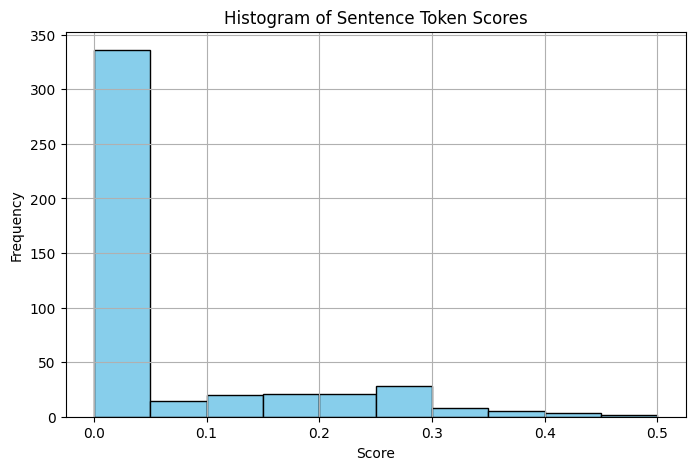

In [ ]:
import matplotlib.pyplot as plt

# Score all sentences by token
token_scores = [
    score_sentence_by_token(sent, top_tokens)
    for sent in doc.sents
]

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(token_scores, bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Sentence Token Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Optional: Brief observation
# Most common range appears to be 0.0 - 0.05


7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

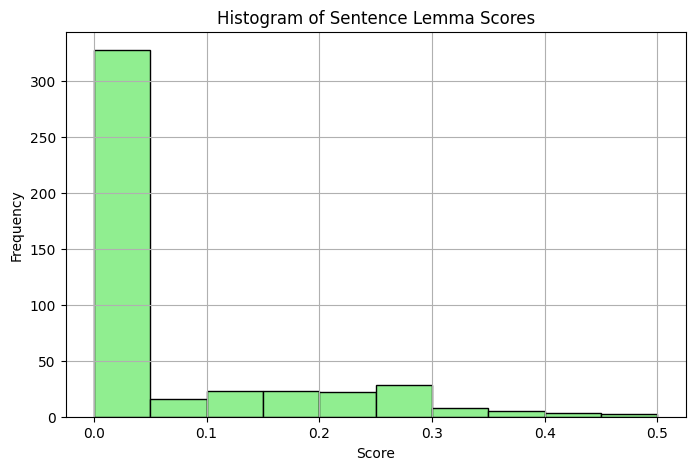

In [ ]:
# Score all sentences by lemma
lemma_scores = [
    score_sentence_by_lemma(sent, top_lemmas)
    for sent in doc.sents
]

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(lemma_scores, bins=10, color='lightgreen', edgecolor='black')
plt.title("Histogram of Sentence Lemma Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Observation (based on your plot)
# Most sentences have lemma scores in the range 0.0 - 0.05


8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

If we only wanted to consider nouns as interesting words, several of the tokens and lemmas from Questions 3 and 4 would be omitted — specifically, any that are not classified as nouns by spaCy.

For example, adjectives, verbs, and adverbs would be excluded. To filter for nouns only, we would modify the token and lemma lists like this:

```python
# Filter tokens that are nouns
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space and token.pos_ == "NOUN"
]

# Same idea for lemmas
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space and token.pos_ == "NOUN"
]
